In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/home/prasun/GitDemo/Learning_Deep_Learning/Lesson6/banglore_house.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()
scaled_X = sc_x.fit_transform(df.drop(["price"],axis="columns"))
scaled_y = sc_y.fit_transform(df[["price"]])


In [6]:
w1 = np.array([[1.],[1.]])
w2 = np.array([1.,1.])
print(w1.shape, w2.shape)
# (w.dot(scaled_X))

(2, 1) (2,)


In [7]:
def batch_gd(X,y_label,epochs=100,rate =0.05):
    num_of_feature = X.shape[1]
    w = np.ones(num_of_feature)
    b = 0
    sample = X.shape[0]

    cost_lst = []
    epoch_lst = []

    for i in range(epochs):
        f_x = np.dot(w,X.T) + b
        dj_dw =  np.dot(scaled_X.T,(f_x - y_label))/sample
        dj_db =  np.mean(f_x - y_label)

        w = w - (rate * dj_dw)
        b = b - (rate * dj_db)

        cost = np.mean(np.square(y-f_x))/2

        cost_lst.append(cost)
        epoch_lst.append(i)

    return w,b,cost_lst,epoch_lst 


In [8]:
y =scaled_y.reshape(scaled_y.shape[0])

In [9]:
w,b,cost_lst,epoch_lst = batch_gd(scaled_X,y,epochs= 200)
w,b

(array([0.70697753, 0.6744668 ]), -0.23023942096425665)

Text(0.5, 1.0, 'Learning Curve')

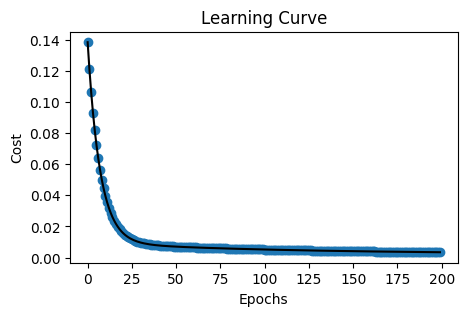

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize= (5,3))
plt.scatter(epoch_lst,cost_lst)
plt.plot(epoch_lst,cost_lst,color ="black")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Learning Curve")

In [11]:
def predict(area,bedroom,w,b):
    X = pd.DataFrame([area,bedroom])
    X_scaled = sc_x.transform([[area,bedroom]])[0]
    scaled_price = w[0]*X_scaled[0] +w[1]*X_scaled[1] + b
    return sc_y.inverse_transform([[scaled_price]])[0][0]    

In [12]:
predict(2600,4,w,b)

128.44728299049075

In [13]:
import random
random.randint(0,6)

0

In [14]:
import random
def stochastic_gradient_descent(X,y_label,epochs=100,rate=0.05):
    num_of_feature = X.shape[1]
    w = np.ones(num_of_feature)
    b = 0
    sample_size = X.shape[0]

    cost_lst = []
    epoch_lst = []

    for i in range(epochs):
        ranidx = random.randint(0,sample_size-1)
        X_idx = X[ranidx]
        y_idx = y_label[ranidx]
        f_x = np.dot(X_idx.T,w) + b
        dj_dw =  np.dot(X_idx.T,(f_x - y_idx))/sample_size
        dj_db =  np.mean(f_x - y_idx)

        w = w - (rate * dj_dw)
        b = b - (rate * dj_db)

        cost = np.square(f_x-y_idx)

        if i%10 == 0:
            cost_lst.append(cost)
            epoch_lst.append(i) 

    return w,b,cost_lst,epoch_lst


In [15]:
w_sgd,b_sgd,cost_lst,epoch_lst = stochastic_gradient_descent(scaled_X,y,epochs= 500)

Text(0.5, 1.0, 'Learning Curve')

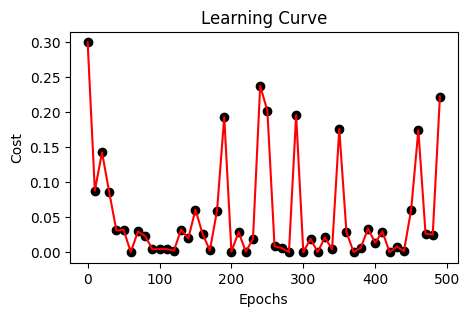

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize= (5,3))
plt.scatter(epoch_lst,cost_lst,color = "black")
plt.plot(epoch_lst,cost_lst,color ="red")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Learning Curve")

In [1]:
pip install Sympy

  Obtaining dependency information for Sympy from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath<1.4,>=1.1.0 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 2.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Finding Derivative with Symbolic Python
import sympy
J,w = symbols('J,w')
J = w**2
J

w**2

In [11]:
dj_dw = diff(J)
dj_dw, dj_dw.subs([(w,3)]) #derivative at w = 3

(2*w, 6)